# **GRUPO 1**:Lucía Chicharro, María Montero,  Patricia Ramos y Lydia Sánchez-Cano.

# Trabajo Final: Regresión.
Walmart es uno de los supermercados más conocidos en los Estados Unidos.Es por ello, por lo que nos genera gran curiosidad saber realmente cuáles son las ventas de dicha corporativa. Tras investigar,surgió la pregunta de que si fuésemos admistradoras de esta empresa, ¿Podríamos predecir cuáles serán las ventas dado un conjunto de características?

Para ello, utilizaremos la base de datos 'Walmart_Store_sales' en formato `csv` obtenida de Kaggle.

En primer lugar, importamos el documento.

In [121]:
from google.colab import files
files.upload()

Saving Walmart_Store_sales.csv to Walmart_Store_sales.csv


{'Walmart_Store_sales.csv': b'Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment\r\n1,05-02-2010,1643690.9,0,42.31,2.572,211.0963582,8.106\r\n1,12-02-2010,1641957.44,1,38.51,2.548,211.2421698,8.106\r\n1,19-02-2010,1611968.17,0,39.93,2.514,211.2891429,8.106\r\n1,26-02-2010,1409727.59,0,46.63,2.561,211.3196429,8.106\r\n1,05-03-2010,1554806.68,0,46.5,2.625,211.3501429,8.106\r\n1,12-03-2010,1439541.59,0,57.79,2.667,211.3806429,8.106\r\n1,19-03-2010,1472515.79,0,54.58,2.72,211.215635,8.106\r\n1,26-03-2010,1404429.92,0,51.45,2.732,211.0180424,8.106\r\n1,02-04-2010,1594968.28,0,62.27,2.719,210.8204499,7.808\r\n1,09-04-2010,1545418.53,0,65.86,2.77,210.6228574,7.808\r\n1,16-04-2010,1466058.28,0,66.32,2.808,210.4887,7.808\r\n1,23-04-2010,1391256.12,0,64.84,2.795,210.4391228,7.808\r\n1,30-04-2010,1425100.71,0,67.41,2.78,210.3895456,7.808\r\n1,07-05-2010,1603955.12,0,72.55,2.835,210.3399684,7.808\r\n1,14-05-2010,1494251.5,0,74.78,2.854,210.3374261,7.808\r\n1,21-05-2010,13

Utilizando la librería `pandas`, leemos el archivo que consta de las siguientes entradas:


*   Store: número de la tienda.
*   Date: semana de ventas.
*   Weekly_Sales: ventas de una determinada tienda (en dólares).
*   Holiday_Flag: si la semana es una semana festiva o no (0=No, 1= Sí)
*   Temperature: temperatura el día de la venta.
*   Fuel_Price: precio de la gasolina en la región (muchos supermercados ofrecen servicio de gasolinera).
*   CPI: índice de consumo predominante.
*   Unemployment: índice de desempleo.


Para un mejor tratamiento de los datos, eliminaremos las columnas 'Store' y 'Date'. Además, nuestros valores objetivos se encuentran en la columna 'Weekly_Sales'.

In [124]:
import pandas as pd
data = pd.read_csv('Walmart_Store_sales.csv', sep=',', delimiter=None, header=0)
data=data.drop(['Store','Date'],axis=1)
targets=data.pop('Weekly_Sales')
print(data.shape)
#mostramos los 10 primeros
print (data.head(10))
data = data.to_numpy()

(6435, 5)
   Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment
0             0        42.31       2.572  211.096358         8.106
1             1        38.51       2.548  211.242170         8.106
2             0        39.93       2.514  211.289143         8.106
3             0        46.63       2.561  211.319643         8.106
4             0        46.50       2.625  211.350143         8.106
5             0        57.79       2.667  211.380643         8.106
6             0        54.58       2.720  211.215635         8.106
7             0        51.45       2.732  211.018042         8.106
8             0        62.27       2.719  210.820450         7.808
9             0        65.86       2.770  210.622857         7.808


In [125]:
type(data)

numpy.ndarray

Presentamos 6435 elementos que poseen 5 características.

In [126]:
data[2:5]

array([[  0.       ,  39.93     ,   2.514    , 211.2891429,   8.106    ],
       [  0.       ,  46.63     ,   2.561    , 211.3196429,   8.106    ],
       [  0.       ,  46.5      ,   2.625    , 211.3501429,   8.106    ]])

## Preparación de los datos.

Seleccionamos nuestros datos de entrenamiento como el 83% aproximadamente de los datos originales.

In [127]:
train_data=data[0:5341]
print(train_data.shape)
print(train_data[6])
type(train_data)

(5341, 5)
[  0.        54.58       2.72     211.215635   8.106   ]


numpy.ndarray

Por tanto, nuestros datos de test son el 17% restante.

In [128]:
test_data=data[5342:]
print(test_data.shape)
print(test_data[6])

(1093, 5)
[  0.      57.75     3.818  128.3995  14.021 ]


In [129]:
train_targets=targets[0:5341]
train_targets = train_targets.to_numpy()
print(train_targets.shape)
train_targets

(5341,)


array([1643690.9 , 1641957.44, 1611968.17, ...,  303908.81,  386344.54,
        356138.79])

In [130]:
test_targets=targets[5342:]
test_targets = test_targets.to_numpy()
print(test_targets.shape)
test_targets

(1093,)


array([357557.16, 402341.76, 377672.46, ..., 734464.36, 718125.53,
       760281.43])

Para poder realizar las operaciones, hemos tenido que convertir los datos utilizando la función `to_numpy()`.

## Normalizamos los datos.

In [147]:
# Normalizamos basándonos en la característica

# Calculamos la media del primer eje de los datos de entrenamiento
mean = train_data.mean(axis=0)
print("##### Media de las 5 características de los datos de entrenamiento ##### ")
print(mean)
# A los datos de entrenamiento le restamos la media
train_data -= mean

# Calculamos la desviación estandar del primer eje de los datos de entrenamiento
std = train_data.std(axis=0)
print("##### Desviación estandar de las 5 características de los datos de entrenamiento ##### ")
print(std)
# A los datos de entrenamiento los dividimos por la desviación estándar
train_data /= std
print("##### Datos de entrenamiento normalizados para la primera tienda ##### ")
print(train_data[0])

#Para los datos de test, usamos la media y la desviación de los datos de entrenamiento
test_data -= mean
test_data /= std
print("##### Datos de test normalizados de la primera tienda##### ")
print(test_data[0])

##### Media de las 5 características de los datos de entrenamiento ##### 
[ 1.43844661e-17 -6.11963412e-16  9.41891513e-16  3.40570942e-16
 -5.53427781e-16]
##### Desviación estandar de las 5 características de los datos de entrenamiento ##### 
[1. 1. 1. 1. 1.]
##### Datos de entrenamiento normalizados para la primera tienda ##### 
[-0.27440292 -0.99399309 -1.70331803  0.96715415  0.06293539]
##### Datos de test normalizados de la primera tienda##### 
[-0.27440292 -0.53657336 -0.02223771 -1.1239716   3.31035013]


## Construcción de la red

In [132]:
import tensorflow as tf
from keras import models
from keras import layers

def build_model():
    # Será un modelo secuencial
    model = models.Sequential()
    # Utilizaremos 64 neuronas en la primera capa y función de activación relu.
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    # Añadiremos una capa intermedia
    model.add(layers.Dense(64, activation='relu'))
    #Debido a que es un problema de regresión, la última capa solo tiene 1 neurona y va en salida abierta
    model.add(layers.Dense(1))
    # Añadimos el optimizador (rmsprop), la función de pérdida (mse:error cuadrático medio) y la métrica (mae: error absoluto medio)
    model.compile(optimizer='rmsprop', loss='mse', 
                  metrics = ['mae'])
    return model

Además, para poder tener un mejor análisis de nuestro modelo generaremos unos datos de validación. En este caso, será 1/4 de validación y 3/4 de entrenamiento.

In [133]:
partial_train_data = train_data[:4005]
partial_eval_train_data = train_data[4006:]
partial_train_targets = train_targets[:4005]
partial_eval_train_targets = train_targets[4006:]

## Entrenamos el modelo

In [146]:
model = build_model()
history = model.fit(partial_train_data, partial_train_targets,
            validation_data=(partial_eval_train_data, partial_eval_train_targets),
                        epochs=100, batch_size=1)
                        # Utilizaremos 100 épocas y un batch_size de 1

Epoch 1/100
4005/4005 [==============================] - 13s 3ms/step - loss: 1770677075968.0000 - mae: 1197214.0000 - val_loss: 550285017088.0000 - val_mae: 632046.5000
Epoch 2/100
4005/4005 [==============================] - 14s 4ms/step - loss: 1140177502208.0000 - mae: 889385.2500 - val_loss: 197708808192.0000 - val_mae: 347547.5312
Epoch 3/100
4005/4005 [==============================] - 13s 3ms/step - loss: 463515844608.0000 - mae: 534821.1250 - val_loss: 355637264384.0000 - val_mae: 519851.3750
Epoch 4/100
4005/4005 [==============================] - 13s 3ms/step - loss: 382876188672.0000 - mae: 503793.9062 - val_loss: 418019311616.0000 - val_mae: 561770.3125
Epoch 5/100
4005/4005 [==============================] - 16s 4ms/step - loss: 361762881536.0000 - mae: 494454.8750 - val_loss: 427352064000.0000 - val_mae: 567771.4375
Epoch 6/100
4005/4005 [==============================] - 14s 4ms/step - loss: 345811779584.0000 - mae: 485692.3125 - val_loss: 427159683072.0000 - val_mae: 5

Tras realizar las 100 épocas, obtenemos que el rango de equivocación es de 467.616 dólares. Es cierto, que para aquellos valores de incluso más del millón de dólares; es una cifra no demasiado alta (pese a ser casi la mitad). Sin embargo, para valores medios es un valor demasiado alto.

In [148]:

mae_history = history.history['val_mae']

In [149]:
mse_history = history.history['val_loss']

In [150]:
# Graficamos las épocas contra la pérdida
import matplotlib.pyplot as plt

plt.plot(range(1, len(mse_history) + 1), mse_history)
plt.xlabel('Epochs')
plt.ylabel('Validación MSE')
plt.show()

In [151]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

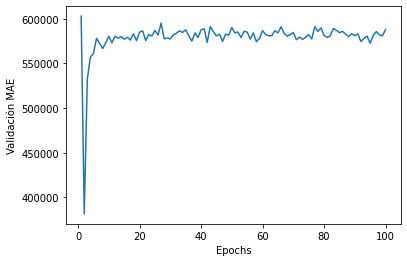

In [139]:
# Graficamos las épocas contra MSE 
import matplotlib.pyplot as plt

plt.plot(range(1, len(mae_history) + 1), mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validación MAE')
plt.show()

In [140]:
import matplotlib.pyplot as plt

loss = history.history['mae']
val_loss = history.history['val_mae']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

### Conclusiones 100 épocas:
Podemos intuir que posiblemente el problema no sea tanto de sobreentrenamiento, sino que 100 es un número demasiado elevado para las épocas. Se puede observar que no por haber ejecutado tantas épocas, el valor varíe demasiado. Es por ello, por lo que probaremos con un menor número de épocas.

In [154]:
model2 = build_model()
history = model2.fit(partial_train_data, partial_train_targets,
            validation_data=(partial_eval_train_data, partial_eval_train_targets),
                        epochs=25, batch_size=1)

Epoch 1/25
4005/4005 [==============================] - 13s 3ms/step - loss: 1768678227968.0000 - mae: 1196362.8750 - val_loss: 548245045248.0000 - val_mae: 630878.5625
Epoch 2/25
4005/4005 [==============================] - 13s 3ms/step - loss: 1119878643712.0000 - mae: 880666.8750 - val_loss: 195070853120.0000 - val_mae: 351760.6250
Epoch 3/25
4005/4005 [==============================] - 14s 4ms/step - loss: 464461955072.0000 - mae: 540311.8750 - val_loss: 362508091392.0000 - val_mae: 523520.1562
Epoch 4/25
4005/4005 [==============================] - 11s 3ms/step - loss: 388668850176.0000 - mae: 507790.4375 - val_loss: 401027858432.0000 - val_mae: 551526.6875
Epoch 5/25
4005/4005 [==============================] - 12s 3ms/step - loss: 367674228736.0000 - mae: 497719.1250 - val_loss: 408003510272.0000 - val_mae: 555963.3750
Epoch 6/25
4005/4005 [==============================] - 11s 3ms/step - loss: 352711507968.0000 - mae: 488546.6875 - val_loss: 435899170816.0000 - val_mae: 574657.

In [155]:
mae_history = history.history['val_mae']
mse_history = history.history['val_loss']

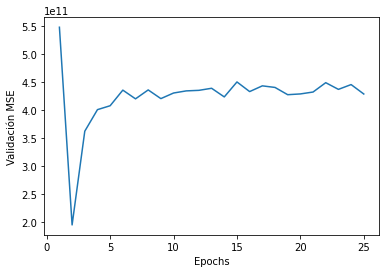

In [156]:
# Graficamos las épocas contra la pérdida
import matplotlib.pyplot as plt

plt.plot(range(1, len(mse_history) + 1), mse_history)
plt.xlabel('Epochs')
plt.ylabel('Validación MSE')
plt.show()

In [157]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

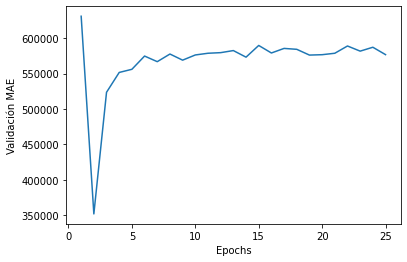

In [158]:
# Graficar las épocas contra MAE 
import matplotlib.pyplot as plt

plt.plot(range(1, len(mae_history) + 1), mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validación MAE')
plt.show()

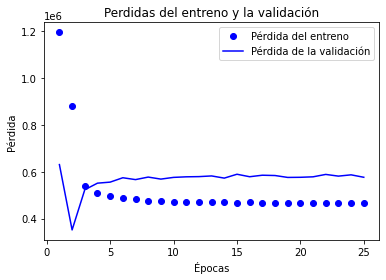

In [159]:
import matplotlib.pyplot as plt

loss = history.history['mae']
val_loss = history.history['val_mae']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

## Conlusiones 25 épocas:
Tras haber reducido el número de épocas, hemos observado con mayor claridad que el modelo comenzaría a sobreentrenarse entonro a las épocas 2 o 3.Ejecutamos el modelo con 3 épocas.

In [170]:
model3 = build_model()
history = model3.fit(partial_train_data, partial_train_targets,
            validation_data=(partial_eval_train_data, partial_eval_train_targets),
                        epochs=3, batch_size=1)

Epoch 1/3
4005/4005 [==============================] - 13s 3ms/step - loss: 1766925139968.0000 - mae: 1195576.1250 - val_loss: 546344534016.0000 - val_mae: 628956.8750
Epoch 2/3
4005/4005 [==============================] - 11s 3ms/step - loss: 1121720860672.0000 - mae: 880008.6250 - val_loss: 197548736512.0000 - val_mae: 351595.2812
Epoch 3/3
4005/4005 [==============================] - 11s 3ms/step - loss: 464534110208.0000 - mae: 539573.9375 - val_loss: 353035943936.0000 - val_mae: 517335.4062


In [171]:
mae_history = history.history['val_mae']
mse_history = history.history['val_loss']

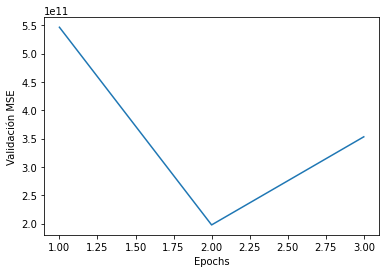

In [172]:
# Graficamos las épocas contra la pérdida
import matplotlib.pyplot as plt

plt.plot(range(1, len(mse_history) + 1), mse_history)
plt.xlabel('Epochs')
plt.ylabel('Validación MSE')
plt.show()

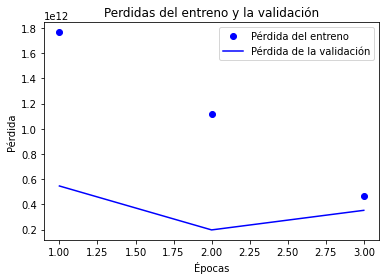

In [173]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

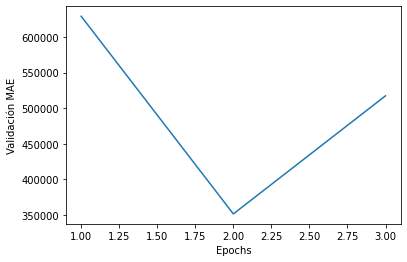

In [174]:
# Graficar las épocas contra MAE 
import matplotlib.pyplot as plt

plt.plot(range(1, len(mae_history) + 1), mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validación MAE')
plt.show()

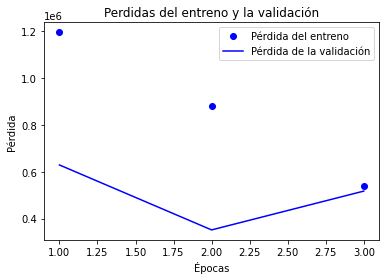

In [175]:
import matplotlib.pyplot as plt

loss = history.history['mae']
val_loss = history.history['val_mae']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

Finalmente, comprobamos que MAE deja de mejorar a partir de la segunda época. Es ciertamente significativo que el modelo se sobreentrente tan rápido. El motivo puede ser que la base de datos escogida tiene pocas características, por lo que el sistema se acostumbra muy rápido a ellas y se sobreentrena con mucha facilidad.Por tanto, se debería buscar una base de datos con mayor número de características o incluso una con más tiendas a estudiar.